<a href="https://colab.research.google.com/github/brytlao/Practical_computer_vision/blob/master/CHAPTER_04_What_is_a_Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 04: What is a Feature?**

Covers types of features used in computer vision.

# **Datasets and libraries required**

In [0]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import cv2

# plots figures inside notebook
%matplotlib inline

# plotting parameters
FIG_WIDTH = 3
FIG_HEIGHT = 2
NUM_ROW = 1

In [2]:
# upload file using explorer
from google.colab import files
uploaded = files.upload()
for k, v in uploaded.items():
  open(k, 'wb').write(v)
img_name = list(uploaded)[0]

# read an image from file
img = cv2.imread(img_name)

Saving dragon.png to dragon (1).png


In [0]:
# plotting function considering gray images:
def plot_cv_img(ax,input_image,img_title,is_gray=False):
    """
    Check if an image is to be displayed gray
    Convert an image from BGR to RGB then plot
    """
    # change color channel
    if not is_gray:
      ax.imshow(cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB))
    else:
      ax.imshow(input_image,cmap='gray')
      
    # turn off axes
    ax.axis('off')

    # set title
    ax.set_title(img_title)

# **Harris corner detection**

**Corner visualization**

In [0]:
# convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [0]:
# harris corner parameters
block_size = 4 # covariance matrix size
kernel_size = 3 # neighborhood kernel
k = 0.01 # for harris corner score

# compute harris corner
corners = cv2.cornerHarris(gray,block_size,kernel_size,k)

# create corner image
display_corner = np.ones(gray.shape[:2])
display_corner = 255*display_corner

# apply thresholding to corner score
thres = 0.01
display_corner[corners>thres*corners.max()] = 10 # display pixel value

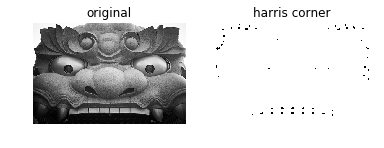

In [6]:
# set figure params
num_fig = 2
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))

# plot original image
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,gray,'original',is_gray=True)

# plot harris corner
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,display_corner,'harris corner',is_gray=True)

**FAST features**

In [0]:
# function for computation of FAST features
def compute_fast_det(filename,is_nms=True,thres=10):
  """
  read image and compute FAST keypoints
  returns image with keypoints
  filename: filename of input image
  is_nms: flag to use non-maximal suppression
  thres: thresholding value
  
  note: if original image is passed as arg,
        the returned image is affected
  """
  # load image with the given filename
  input_img = cv2.imread(filename)
  
  # init FAST object with default values
  fast = cv2.FastFeatureDetector_create()
  
  # find keypoints
  if not is_nms:
    fast.setNonmaxSuppression(0)
  fast.setThreshold(thres)
  kp = fast.detect(input_img,None)
  
  # draw keypoints
  cv2.drawKeypoints(input_img,kp,input_img,color=(255,0,0))
  
  return input_img  

In [0]:
# === compute FAST ===
# thres: 5 
fast5 = compute_fast_det(img_name,is_nms=True,thres=5)

# thres: 10
fast10 = compute_fast_det(img_name,is_nms=True,thres=10)

# thres: 15
fast15 = compute_fast_det(img_name,is_nms=True,thres=15)

# thres: 50
fast50 = compute_fast_det(img_name,is_nms=True,thres=50)

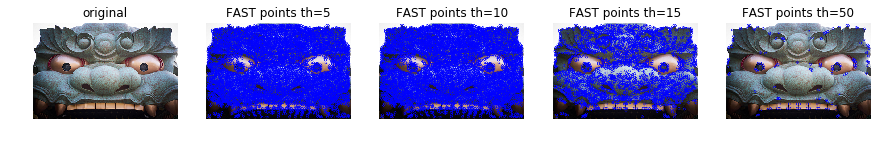

In [9]:
# === plot results ===
# set figure params
num_fig = 5
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))

# plot original image
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,img,'original',is_gray=False)

# plot thres: 5
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,fast5,'FAST points th=5',is_gray=False)

# plot thres: 10
ax = plt.subplot(1,num_fig,3)
plot_cv_img(ax,fast5,'FAST points th=10',is_gray=False)

# plot thres: 15
ax = plt.subplot(1,num_fig,4)
plot_cv_img(ax,fast15,'FAST points th=15',is_gray=False)

# plot thres: 50
ax = plt.subplot(1,num_fig,5)
plot_cv_img(ax,fast50,'FAST points th=50',is_gray=False)

**ORB features**

In [0]:
# function for computation of ORB features
def compute_orb_keypoints(filename):
  """
  read image and compute ORB keypoints
  returns image with keypoints
  """
  # load image
  input_img = cv2.imread(filename)
  
  # create orb object
  orb = cv2.ORB_create()
  
  # set FAST params
  orb.setScoreType(cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)
  
  # detect keypoints
  kp = orb.detect(input_img,None)
  
  # compute descriptors
  kp,des = orb.compute(input_img,kp)
  
  # draw keypoints
  cv2.drawKeypoints(input_img,kp,input_img,color=(255,0,0),flags=2)
  
  return input_img

In [0]:
# === compute ORB ===
orb1 = compute_orb_keypoints(img_name)

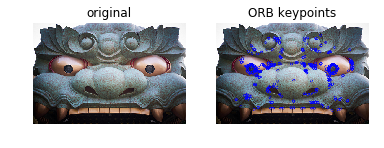

In [12]:
# === plot results ===
# set figure params
num_fig = 2
plt.figure(figsize=(FIG_WIDTH*num_fig,FIG_HEIGHT))

# plot original image
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,img,'original',is_gray=False)

# plot thres: 5
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,orb1,'ORB keypoints',is_gray=False)

# **Applications**

**Finding object in image**

In [0]:
# function for computation of ORB features (without plotting)
def compute_orb_keypoints_noplot(filename):
  """
  read image and compute ORB keypoints
  returns image, keypoints, and descriptors
  """
  # load image
  input_img = cv2.imread(filename)
  
  # create orb object
  orb = cv2.ORB_create()
  
  # set FAST params
  orb.setScoreType(cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)
  
  # detect keypoints
  kp = orb.detect(input_img,None)
  
  # compute descriptors
  kp,des = orb.compute(input_img,kp)
  
  return input_img, kp, des

In [0]:
# brute force matcher function
def brute_force_matcher(des1,des2):
  """
  Brute force matcher for matching ORB feature descriptors
  des1, des2: ORB descriptors for 2 images
  returns matches
  """
  # create BFMatcher object
  bf = cv2.BFMatcher(cv2.NORM_HAMMING2,crossCheck=True)
  
  # match descriptors
  matches = bf.match(des1,des2)
  
  # sort in order of distance
  matches = sorted(matches,key=lambda x:x.distance)
  
  return matches

In [15]:
# load cropped photo using explorer
from google.colab import files
uploaded = files.upload()
for k, v in uploaded.items():
  open(k, 'wb').write(v)
crop_name = list(uploaded)[0]

Saving dragon_crop.png to dragon_crop (1).png


In [0]:
# compute for descriptors
img1,kp1,des1 = compute_orb_keypoints_noplot(img_name)
img2,kp2,des2 = compute_orb_keypoints_noplot(crop_name)

# match descriptors
matches = brute_force_matcher(des1,des2)

# compute for match
thres = 10
draw_params = dict(matchColor=(0,255,0),
                   singlePointColor=(255,0,0),
                   flags=0)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,
                       matches[:thres],None,**draw_params)

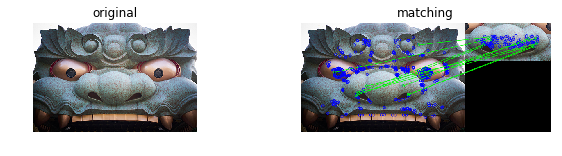

In [17]:
# === plot results ===
# figure parameters
num_fig = 2
plt.figure(figsize=(FIG_WIDTH*num_fig*1.7,FIG_HEIGHT))

# plot original image
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,img,'original',is_gray=False)

# plot first thres matches
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,img3,'matching',is_gray=False)

**Is it similar?**

In [18]:
# load different angled photo using explorer
from google.colab import files
uploaded = files.upload()
for k, v in uploaded.items():
  open(k, 'wb').write(v)
angle_name = list(uploaded)[0]

Saving dragon_angle.PNG to dragon_angle.PNG


In [0]:
# function for computation of ORB features (with downsampling)
def compute_orb_keypoints_pyrdown(filename):
  """
  read image and compute ORB keypoints
  returns image, keypoints, and descriptors
  """
  # load image
  input_img = cv2.imread(filename)
  
  # downsample image
  input_img = cv2.pyrDown(input_img)
  input_img = cv2.pyrDown(input_img)
  
  # create orb object
  orb = cv2.ORB_create()
  
  # set FAST params
  orb.setScoreType(cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)
  
  # detect keypoints
  kp = orb.detect(input_img,None)
  
  # compute descriptors
  kp,des = orb.compute(input_img,kp)
  
  return input_img, kp, des

In [0]:
# brute force matcher function (same as above)
def brute_force_matcher(des1,des2):
  """
  Brute force matcher for matching ORB feature descriptors
  des1, des2: ORB descriptors for 2 images
  returns matches
  """
  # create BFMatcher object
  bf = cv2.BFMatcher(cv2.NORM_HAMMING2,crossCheck=True)
  
  # match descriptors
  matches = bf.match(des1,des2)
  
  # sort in order of distance
  matches = sorted(matches,key=lambda x:x.distance)
  
  return matches

In [0]:
# compute for descriptors
img1,kp1,des1 = compute_orb_keypoints_noplot(img_name)
img2,kp2,des2 = compute_orb_keypoints_noplot(angle_name)

# match descriptors
matches = brute_force_matcher(des1,des2)

# compute for match
thres = 20
draw_params = dict(matchColor=(0,255,0),
                   singlePointColor=(255,0,0),
                   flags=0)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,
                       matches[:thres],None,**draw_params)

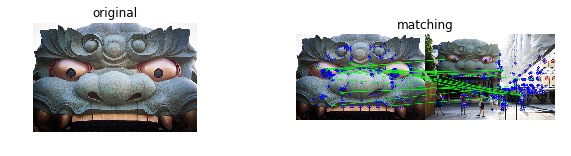

In [22]:
# === plot results ===
# figure parameters
num_fig = 2
plt.figure(figsize=(FIG_WIDTH*num_fig*1.7,FIG_HEIGHT))

# plot original image
ax = plt.subplot(1,num_fig,1)
plot_cv_img(ax,img,'original',is_gray=False)

# plot first thres matches
ax = plt.subplot(1,num_fig,2)
plot_cv_img(ax,img3,'matching',is_gray=False)